<a href="https://colab.research.google.com/github/natnew/Python-Projects-Construction-Data-Analysis/blob/main/Data_Science_BootCamp_Working_With_Data_in_Python_Week_7_Task_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

As discussed in the lectures this week, data pre-processing can be broken into three 
constituent processes: **data cleaning, data preparation and data transformation**. Data preprocessing should be performed in that order (i.e. data cleaning first), for two reasons: firstly, 
as there are techniques applied in the later stages that have dependencies in the earlier 
stages, and secondly, as the condition of the data becomes more specialised (i.e. tailored for 
your purposes) the further one progresses through the pre-processing phase.
Within each stage however, the order of operations is less defined. For instance, we shall 
begin today’s task with missing value analysis. There is no requirement for this to be the 
initial task within data cleaning; the important thing is just that all of the data cleaning is 
done before moving on to the data preparation phases, and likewise, that preparation is 
complete prior to any data transformation occurring.

*Please note that today’s task is not a comprehensive account of every process that you could 
possibly encounter within data pre-processing. Rather, it is designed to provide you with 
practical experience of performing some of the more common tasks within this phase of the 
data science workflow.*

Background to the Problem
You have been given access to the Boston housing dataset, which provides data on several 
housing areas in Boston and the surrounding districts. You tasked with obtaining insight into 
the following questions:

*"Predicting the monetary value of properties in residential zones distant from the Charles 
River.”*

You are required to condition this dataset into a format suitable to be used for statistical 
modelling, so that the above question may be effectively answered.

In [35]:
#import Pnadas library
import pandas as pd

In [36]:
#Read the csv file
df = pd.read_csv('housing.csv')

Display the first 50 rows of the dataframe to get an overview of the data. You may notice 
just through the eye test that some of the data are missing (cells containing ‘NaN’). We can 
check for the proportion of missing values using the pd.isna() function, where the value of 
“NaN” is used by Python to denote missingness. The feature (column) “RM” seems to have 
some missing values, so we will start there. Use the following commands:

In [37]:
df[:50]

,CID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,208,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,778,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,79,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,34.7
3,197,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,687,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2
5,587,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,28.7
6,743,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,22.9
7,689,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,27.1
8,420,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,16.5
9,521,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,18.9


In [38]:
missing=df['RM'].isna()
missing_sum = sum(missing==True)
missingness = missing_sum/516*100
print (''+'Missingness is %.2f'%+missingness+"%.")

Missingness is 5.23%.


Note the way we have formatted the float variable missingness to display only to two 
decimal places. 
Note that the value of 516 come from the total number of observations in the dataset. To 
identify this value, use the df.shape property. We could grab this directly by changing the 
third line of code above to this:

In [39]:
df.shape

(516, 13)

In [40]:
missingness = missing_sum/df.shape[0]*100

These commands identify the number of missing values within the dataframe df, convert 
that to a proportion of the total values, and print the output as a percentage to two decimal 
places. 
For df you should obtain a value of around 5.23%, which is a low enough value to allow for us 
to “fix” the missingness. In a real project, especially when the dataset is large enough to 
make missing value identification by eye a difficult task, this process should be completed for 
every feature. A fast way to see which columns have missing data is to count the number of 
NaN cells across the whole dataframe by column:


In [41]:
df.isna().sum()

CID         0
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         27
AGE         0
DIS        22
RAD         0
TAX         0
PTRATIO     0
MEDV        0
dtype: int64

However, for today’s task, you will notice that only one other feature (‘DIS’) contains 
missingness. Perform the process again for “DIS”. What percentage of values in this feature 
are missing?


In [42]:
missing=df['DIS'].isna()
missing_sum = sum(missing==True)
missingness = missing_sum/516*100
print (''+'Missingness is %.2f'%+missingness+"%.")

Missingness is 4.26%.


The next step is to diagnose the degree of missingness within the data. The best-case 
scenario is that the data is missing completely at random, where the worst case is that the 
data is missing not at random. To test for this, we can use Little’s MCAR test. 
To further explore missingness within the data, we can plot the missing data to provide a 
visualisation to help us identify where the missing values are (and also, confirm that it is only 
the two variables that contain missingness). We first need to import the seaborn library to 
give nicer formatting to the chart:

In [43]:
#import seaborn
import seaborn as sns

In [44]:
#import matplotlib
import matplotlib.pyplot as plt


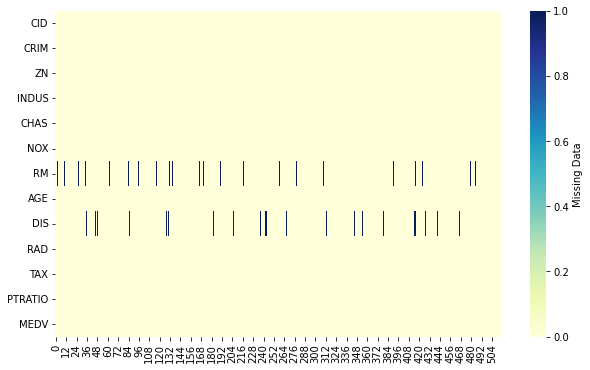

In [45]:
#Then create the visualisation plot as follows:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
 cmap="YlGnBu",
 cbar_kws={'label': 'Missing Data'})
plt.show()

The plot that is produced will indicate the total level of missing data within the dataset, and 
the proportion of each individual feature that is missing. The next step is to begin attempting 
to diagnose the missingness, to identify whether we are dealing with data that is MCAR 
(Missing Completely At Random — see https://soprasteriaanalytics.se/2020/01/23/aneasy-way-to-deal-with-missing-data-imputation-by-regression/). Unfortunately for us, 
there is no readily available version of Little’s MCAR test in Python. If you want to explore 
whether the missing values in our dataset are, in fact, MCAR and are happy to experiment 
with the R programming language, then you can use the mcar_test function in the naniar
library using the following command.


In [46]:
# the follwoing is used to experiment with R programming - mcar_test(dataset)

Note, the above only works in R so don’t try it in Python. See 
https://www.rdocumentation.org/packages/naniar/versions/0.6.1.

Note, the above only works in R so don’t try it in Python. See 
https://www.rdocumentation.org/packages/naniar/versions/0.6.1.

The value produced for this data should indicate that this missingness is in fact MCAR. This 
means that we can use a variety of methods for replacing the missing values.
Assuming you haven’t spent a happy couple of hours trying out R, it can be reported that if 
you had, you would have found that our data is MCAR. The volume of missing data is also 
relatively small so we will use a substitution (imputation) method to replace the missing 
values. First, we must decide on which measure of the data to perform the imputation: the 
mean, median, or the mode. Produce a histogram to view the distribution of values within 
df['RM'].

In [47]:
df['RM']

0      6.575
1      6.421
2        NaN
3      6.998
4      7.147
       ...  
511    5.985
512    5.985
513    5.985
514    5.985
515    5.985
Name: RM, Length: 516, dtype: float64

What does this distribution tell you about the most appropriate measure of central 
tendency?

We will therefore use the mean as the substitute value of choice. Use the DataFrame.mean()
function to try and calculate the mean value for “RM”. 

In [48]:
df['RM'].mean()


6.284541922290399

Now, to replace the missing values in the RM with the mean value for “RM”, use the 
following commands:

In [49]:
#import numpy
import numpy as np


In [50]:
mean = df['RM'].mean()
df['RM'].replace(np.NAN,mean, inplace=True)

The first line calculates the mean of the column. Note, the default behaviour of 
DataFrame.mean() is to ignore null or empty values, so the calculation is not affected by the 
missing data (see the documentation at https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.DataFrame.mean.html, paying attention to the second 
argument of the function).

The second line uses the handy DataFrame.replace() function to replace all values in the RM 
column that are not-a-number with the mean we just calculated. The inplace=True tells the 
function to change the values in the dataframe. If we didn’t do that we would have had to 
copy the result of the function to a new location (which could be the same variable name) like 
this

In [51]:
df['RM'] = df['RM'].replace(np.NAN,mean)


Upon viewing the data again, you should notice that the previously missing values have been 
substitute

In [52]:
df[:16]

,CID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,208,0.00632,18.0,2.31,0,0.538,6.575000,65.2,4.0900,1,296,15.3,24.0
1,778,0.02731,0.0,7.07,0,0.469,6.421000,78.9,4.9671,2,242,17.8,21.6
2,79,0.02729,0.0,7.07,0,0.469,6.284542,61.1,4.9671,2,242,17.8,34.7
3,197,0.03237,0.0,2.18,0,0.458,6.998000,45.8,6.0622,3,222,18.7,33.4
4,687,0.06905,0.0,2.18,0,0.458,7.147000,54.2,6.0622,3,222,18.7,36.2
5,587,0.02985,0.0,2.18,0,0.458,6.430000,58.7,6.0622,3,222,18.7,28.7
6,743,0.08829,12.5,7.87,0,0.524,6.012000,66.6,5.5605,5,311,15.2,22.9
7,689,0.14455,12.5,7.87,0,0.524,6.172000,96.1,5.9505,5,311,15.2,27.1
8,420,0.21124,12.5,7.87,0,0.524,5.631000,100.0,6.0821,5,311,15.2,16.5
9,521,0.17004,12.5,7.87,0,0.524,6.004000,85.9,6.5921,5,311,15.2,18.9


Also re-run the cell that prints a graph of the missing data. 

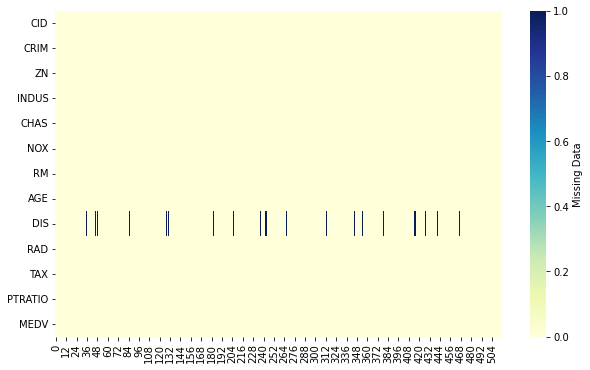

In [53]:
#Then create the visualisation plot as follows:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
 cmap="YlGnBu",
 cbar_kws={'label': 'Missing Data'})
plt.show()

Now, repeat the process for the “DIS” feature, beginning with plotting a histogram and 
selecting a suitable substitute value to be used based upon the distribution.

In [54]:
missing=df['DIS'].isna()
missing_sum = sum(missing==True)
missingness = missing_sum/516*100
print (''+'Missingness is %.2f'%+missingness+"%.")

Missingness is 4.26%.


In [55]:
df['DIS']

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
511    4.8122
512    4.8122
513    4.8122
514    4.8122
515    4.8122
Name: DIS, Length: 516, dtype: float64

In [56]:
df['RM'].mean()

6.284541922290398

In [57]:
mean = df['DIS'].mean()
df['DIS'].replace(np.NAN,mean, inplace=True)

In [58]:
df['DIS'] = df['DIS'].replace(np.NAN,mean)

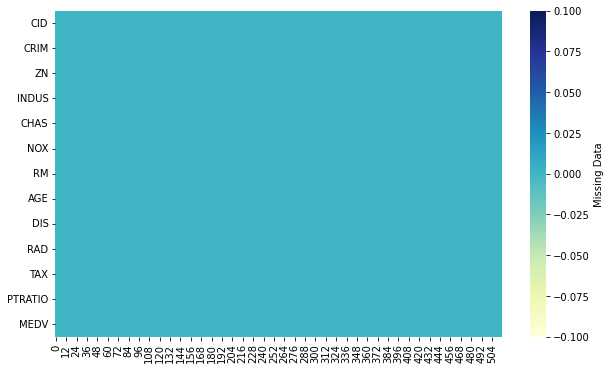

In [59]:
#Then create the visualisation plot as follows:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
 cmap="YlGnBu",
 cbar_kws={'label': 'Missing Data'})
plt.show()

We know that due to the geography of Boston and the surrounding area, it is impossible for 
two zones to possess exactly the same attributes. Therefore, any duplicate entries in the 
dataset must be erroneous, and should be removed. We can check whether there are any 
duplicate rows, thus

In [61]:
df[df.duplicated()]

,CID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV


In case there are any duplicate rows we can remove them thus:

In [62]:
df.drop_duplicates(keep=False, inplace=False)

,CID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,208,0.00632,18.0,2.31,0,0.538,6.575000,65.2,4.0900,1,296,15.3,24.0
1,778,0.02731,0.0,7.07,0,0.469,6.421000,78.9,4.9671,2,242,17.8,21.6
2,79,0.02729,0.0,7.07,0,0.469,6.284542,61.1,4.9671,2,242,17.8,34.7
3,197,0.03237,0.0,2.18,0,0.458,6.998000,45.8,6.0622,3,222,18.7,33.4
4,687,0.06905,0.0,2.18,0,0.458,7.147000,54.2,6.0622,3,222,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,125,0.05497,0.0,5.19,0,0.515,5.985000,45.4,4.8122,5,224,20.2,19.0
512,987,0.05497,0.0,5.19,0,0.515,5.985000,45.4,4.8122,5,224,20.2,19.0
513,865,0.05497,0.0,5.19,0,0.515,5.985000,45.4,4.8122,5,224,20.2,19.0
514,632,0.05497,0.0,5.19,0,0.515,5.985000,45.4,4.8122,5,224,20.2,19.0


See https://www.statology.org/pandas-drop-duplicates

We will move on to the process of data preparation. 
Data Preparation
The first step that we will take is to remove any trivial features. A trivial, or redundant, 
features is, and one that will add no value to the analysis, and is therefore unfavourable to 
the signal-to-noise ratio. An example of this is unnecessary identifiers. In this dataset, the feature “CID” is an identifier used by the Boston City Council to allocate zones, but as the 
values are arbitrary, the inclusion of this feature into a statistical model would actually have 
a detrimental effect on the predictive capacity of the model, as it would likely be interpreted 
as a feature of continuous numerical data. As CID is the first feature within the dataset, to 
remove the feature, use the following command


In [63]:
df=df.iloc[:, 1:]

The next stage of the preparation process is to remove any observations that are irrelevant 
to the investigation. As was stated in the research question, this investigation is only 
interested in property zones which are not bounded to the Charles River, and therefore, and 
data pertaining to zones that are bounded to the river should be removed from the dataset. 
The vicinity to the river is shown by the feature “CHAS”, a Boolean feature which takes the 
value of 1 is the zone bounds the river, and a value of 0 if not. 

To filter the data so that only the observations with a “0” value for “CHAS” are included, use 
the following command:

In [67]:
#df=df[(df.CHAS == 0)

We can on more than one condition, so for example, if you wished to filter the dataset for 
residential zones not bounded to the Charles River and with a tax code of 311, the following 
could be used:

In [66]:
df=df[(df.CHAS == 0) & (df.TAX == 311)]


Next, we will recode a feature into a format that is easier to manage. Instead of using the 
“NOX” feature, which records the levels of nitrogen oxides in the atmosphere, we will recode 
this into a Boolean feature which indicates whether a zone is classed as having a high level of 
pollution, with high pollution levels being given as a concentration of over 0.7 parts per 10 
million. We will call this feature “POL”. To create this feature and add it to the existing 
dataset, use the following command:


In [68]:
df['POL']= np.where(df.NOX >0.7, True, False)


In [69]:
#We can see which rows have a high POL level
display(df[df.POL==True])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV,POL


Another task that frequently occurs in data preparation is the computation of new features, 
based on values already present within the data. For this investigation, we wish to compute 
a new categorical feature that will provide an approximation of the difficulty of commuting 
from a property within that zone, to be named “CMTE”. To achieve this, we will draw data 
from the weighted distance to the employment centres of Boston, and the accessibility index 
for radial highways that facilitate mass transit around the city, represented by the features 
“DIS” and “RAD” respectively. The rule that we will use is as follows:

* If a zone has a mean distance of less than 3 miles from the main employment 
centres, the commute rating is “good”.
* If a zone has a mean distance from the employment centres of more than 3 miles, but 
has good access to the radial highways, then the commute rating is “moderate”.
* If a zone has a mean distance from the employment centres of more than 3 miles, 
combined with limited access to the radial highways, then the commute rating is
“poor”.

We can condense these rules into a np.where function, where one np.where resides as one 
of the logical outcomes of another. Use the following command to compute the new feature, 
and then add it into the dataset through the usual means

In [70]:
df['CMTE']=np.where(df.DIS <3, "Good", np.where(df.RAD < 4, "Moderate", "Poor"))

Data Transformation
To conclude today’s workshop, we shall perform some data transformations. 
Standardisation is used to convert features into a condition better able to be interpreted by 
statistical models. The first method that we will employ is standardisation, where the values 
in a feature are transformed to a scale where the mean lies at 0 and the standard deviation is 
1. We will standardise the “CRIM” feature, showing the crime rate within each residential 
zone. To do this, use the following command:

In [71]:
df['CRIM_stan']=(df['CRIM']-df['CRIM'].mean())/df['CRIM'].std()

See https://www.statology.org/standardize-data-python/ for why this does the job. There is 
also a StandardScaler function in the sklearn library (see https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) but the 
above method is quite simpe and doesn’t require importing anything into our program. 
Display the dataset to see how the feature has been transformed.
However, let’s see how to do it with this imported function. First, import the function:

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
#Now use it:
df['CRIM_stan']=StandardScaler().fit_transform(df[['CRIM']])

Note the double [[]] in the range specification of the dataframe df. This is because 
StandardScaler needs to be a two-dimensional data structure. If we look at the shape of the 
‘CRIM’ column:

In [74]:
df['CRIM'].shape

(7,)

You will see it has only one dimension as we would expect from a column of scalar data. To 
give it the two dimensions StandardScaler is expecting we need the double [[]]:


In [75]:
df[['CRIM']].shape


(7, 1)

See https://stackoverflow.com/questions/51643004/apply-minmaxscaler-on-a-pandascolumn
Next, we will perform a range-scaling transformation, sometimes called a min-max 
transformation, on the “INDUS” feature. To do this, we need to introduce the function named 
MinMaxScaler:


In [76]:
from sklearn.preprocessing import MinMaxScaler

We can then apply the function to apply the range-scaling to “INDUS” and store the result in 
a new column:

In [77]:
df['INDUS_scale']=MinMaxScaler().fit_transform(df[['INDUS']])


Note that all of the values within the “INDUS_scale” feature now fall a point between 0 and 
1. This transformation works well for features that represent a proportional value. In a real 
data cleaning situation, transformations may be applied to the majority of the features 
within a dataset.

# Immontherapy CSV Dataset

Download and the import the “immontherapy.csv” dataset from Blackboard. 
1) a. What features within the dataset have missing data?
b. What percentage of the total dataset is missing. What percentage of data is 
missing for the features identified in Part A. 
2) Identify a suitable method of replacing the missing values in each of the features, and 
then use this method to replace the values so that each feature has complete data. 
3) To make the identification of potentially troublesome issues for patients, you have 
been requested to create a new feature recording the induration diameter in a more 
straightforward way. 
a. Compute a new feature. For this new feature, the induration diameter should 
be coded as follows:
Small, when the diameter is less than 20.
Medium, when the diameter ranges from 20 to 50.
Large, when the diameter is greater than 50. 
b. Based upon this new representation of the data, which size of induration 
appears most frequently?